# Penjelasan

# Import Library

In [1]:
import numpy as np
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

warnings.filterwarnings("ignore")

pd.set_option("display.max.columns", None)

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Evaluate  Models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading

In [2]:
df = pd.read_csv('../../Dataset/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data Cleaning

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [11]:
# Memilih kolom numerik yang bukan bertipe objek
numeric_columns = df.select_dtypes(exclude='object').columns

# Memilih kolom numerik yang memiliki nilai NaN
numeric_columns_with_nan = df[numeric_columns].columns[df[numeric_columns].isna().any()].tolist()

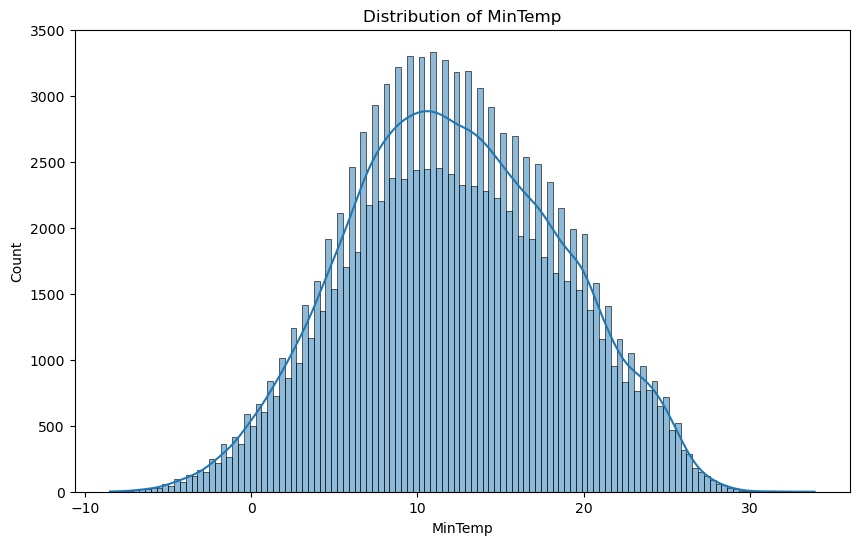

Skewness of MinTemp: 0.02389982065241537


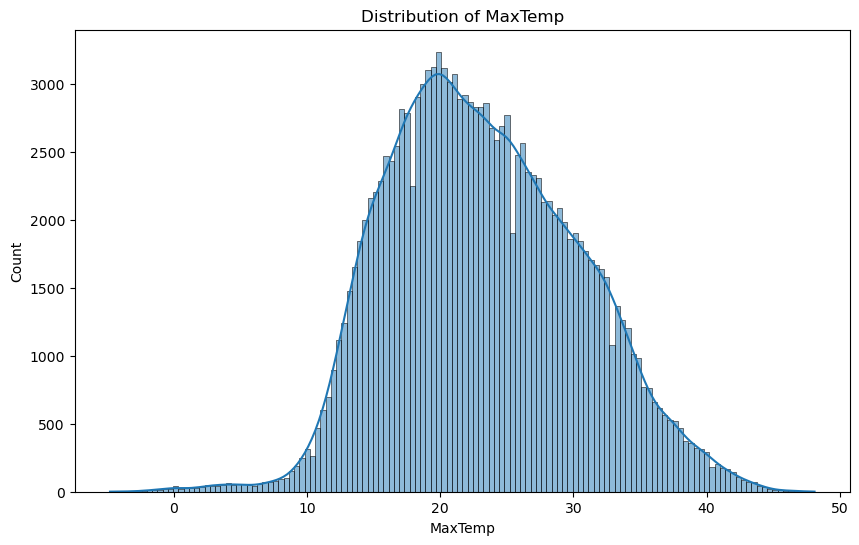

Skewness of MaxTemp: 0.22491661455913778


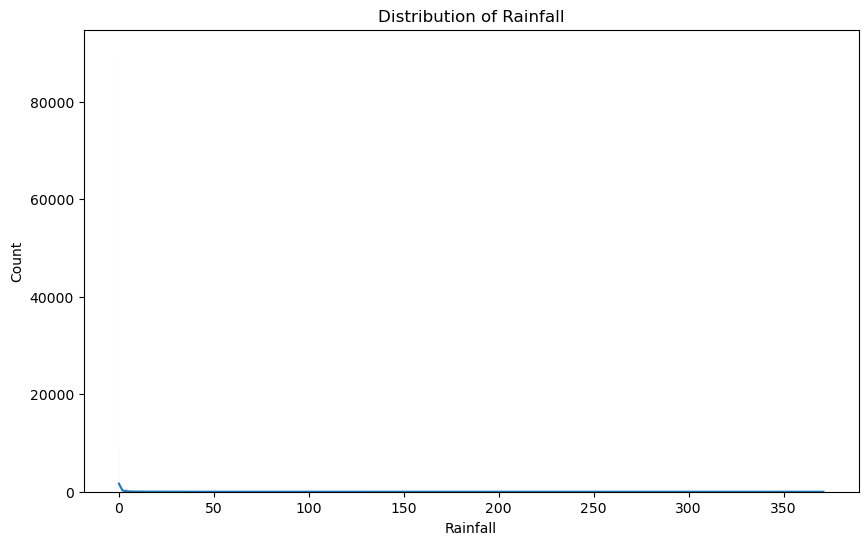

Skewness of Rainfall: 9.88806106787276


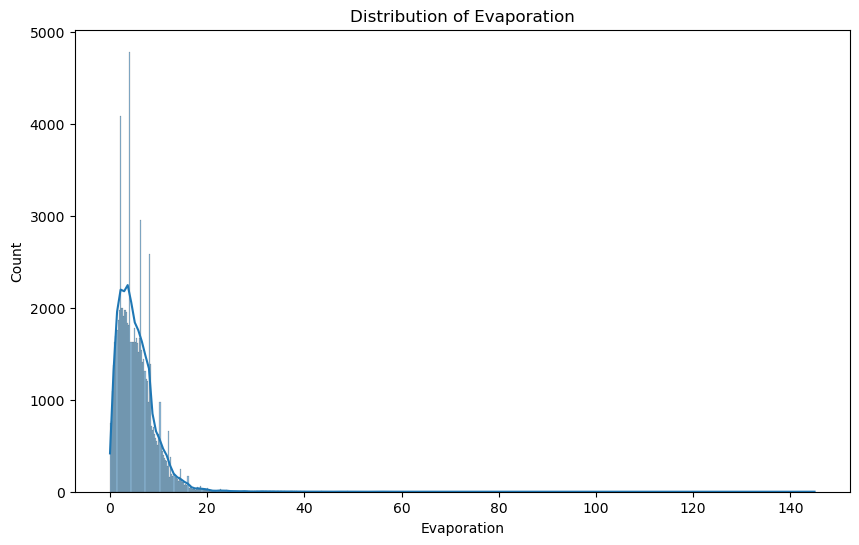

Skewness of Evaporation: 3.7468339786153395


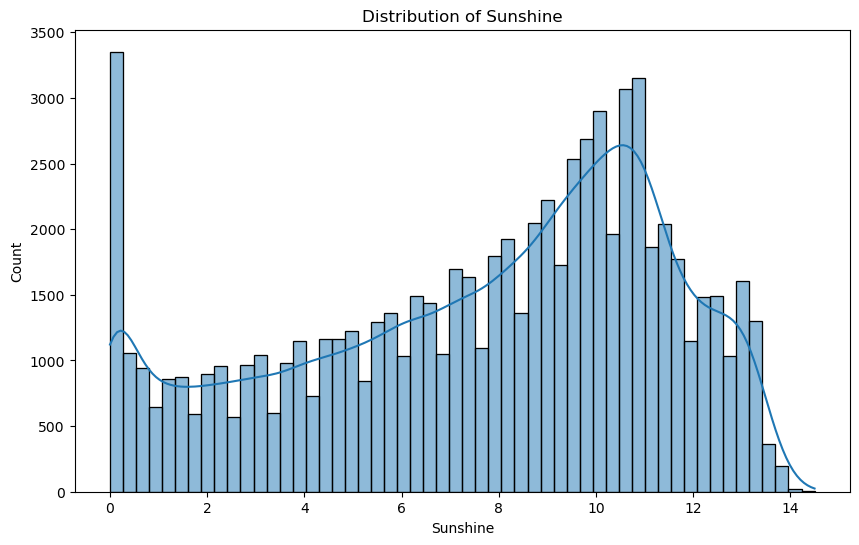

Skewness of Sunshine: -0.5029112767235805


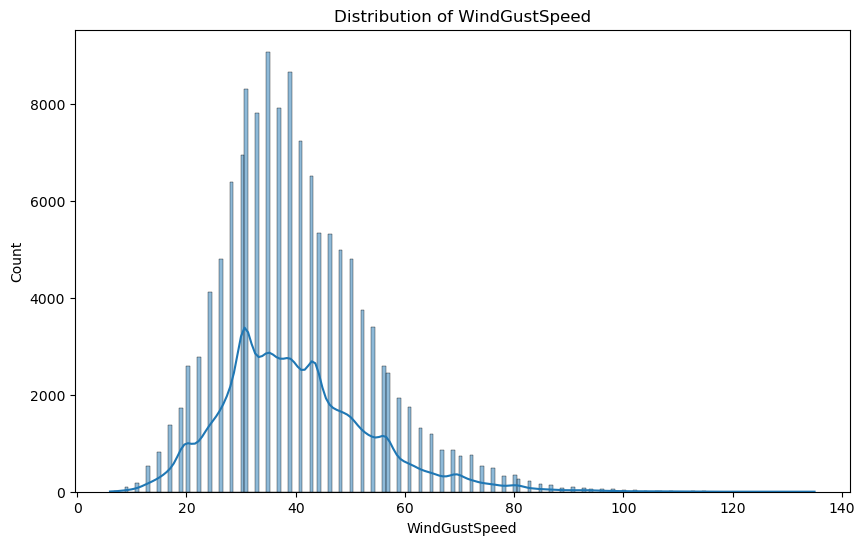

Skewness of WindGustSpeed: 0.8743045672925758


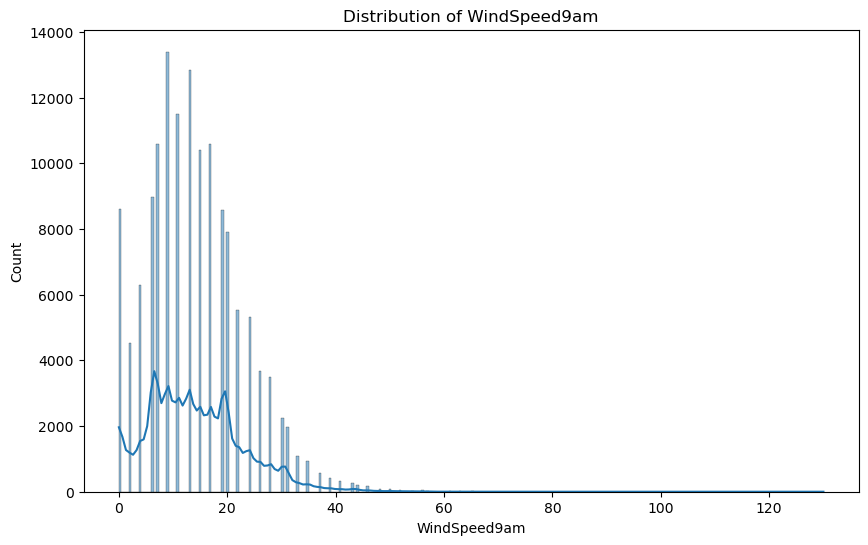

Skewness of WindSpeed9am: 0.7754936899676234


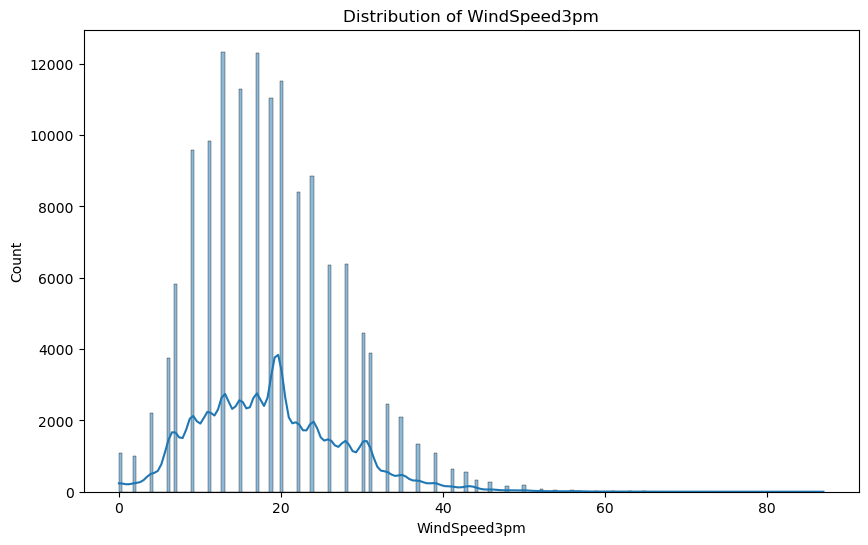

Skewness of WindSpeed3pm: 0.6314326033476736


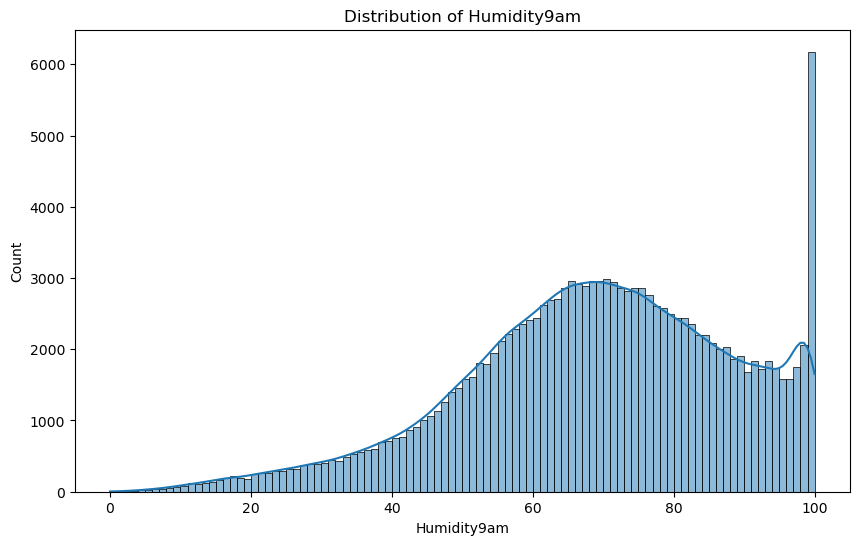

Skewness of Humidity9am: -0.48282077354746405


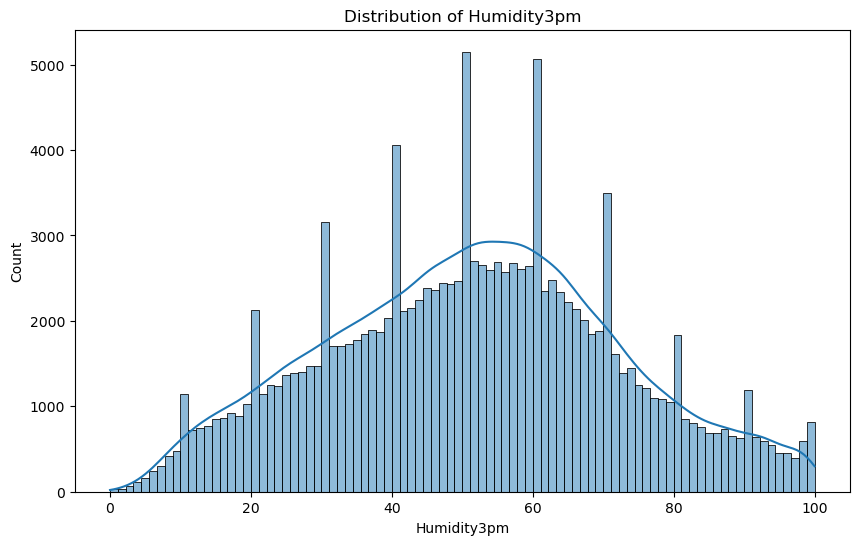

Skewness of Humidity3pm: 0.034515442931485785


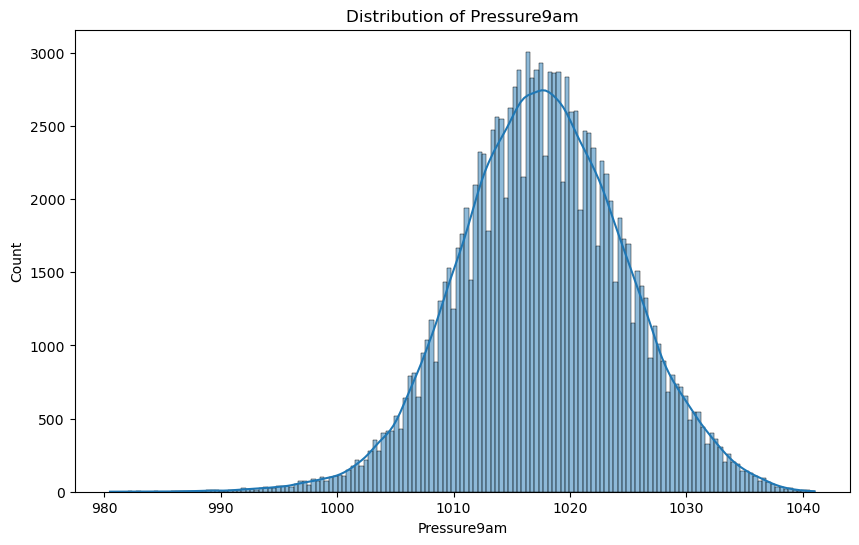

Skewness of Pressure9am: -0.0962108938783355


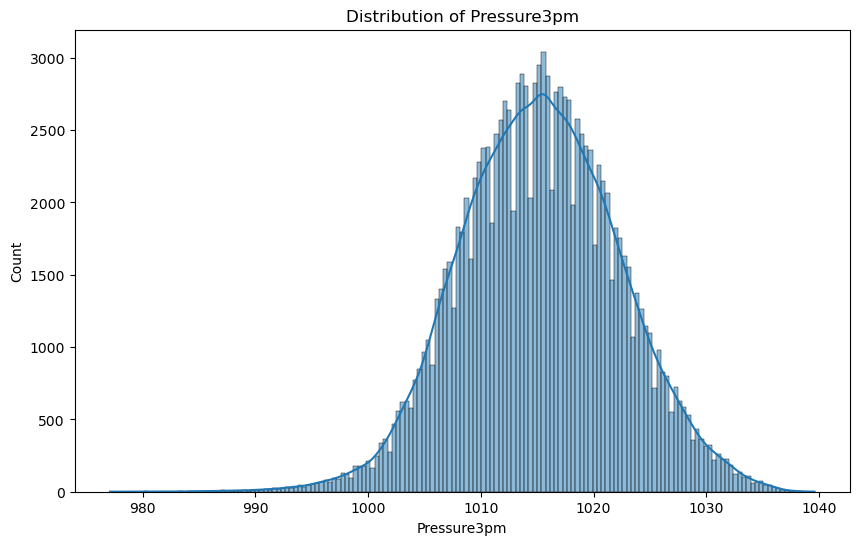

Skewness of Pressure3pm: -0.04619761861409882


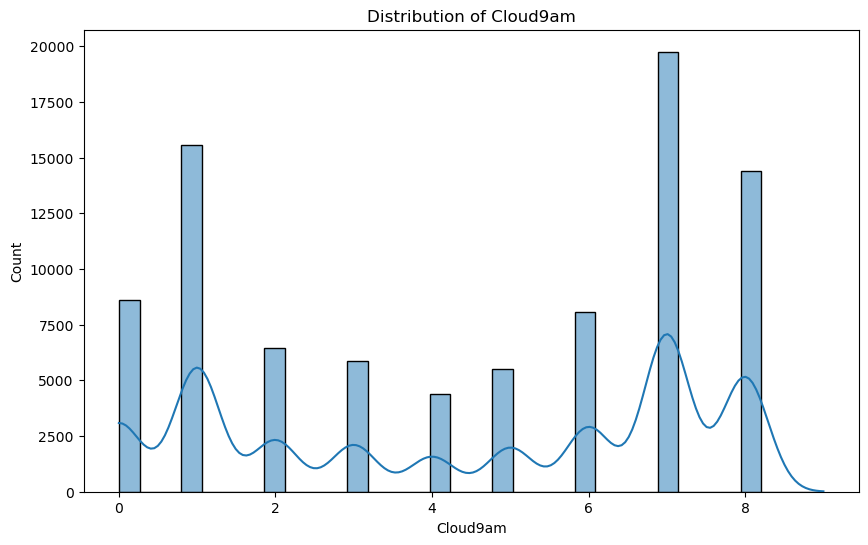

Skewness of Cloud9am: -0.22428553889493957


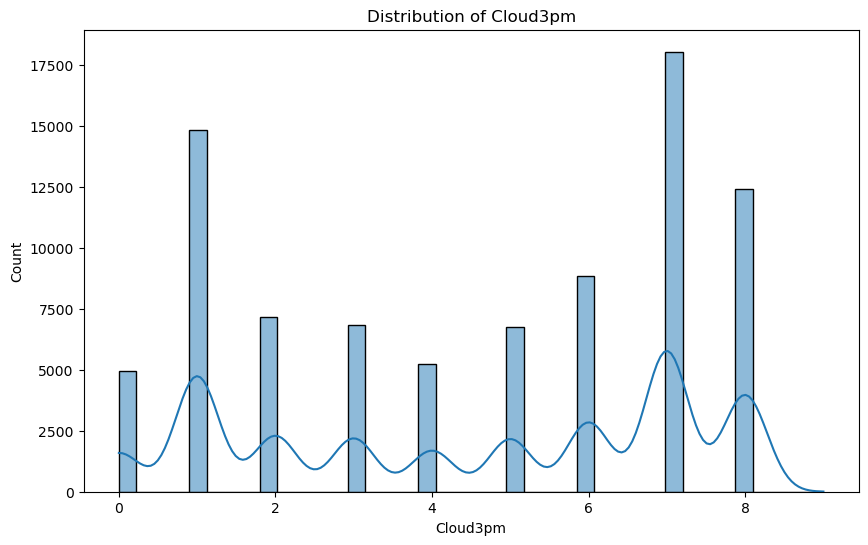

Skewness of Cloud3pm: -0.22409236486115175


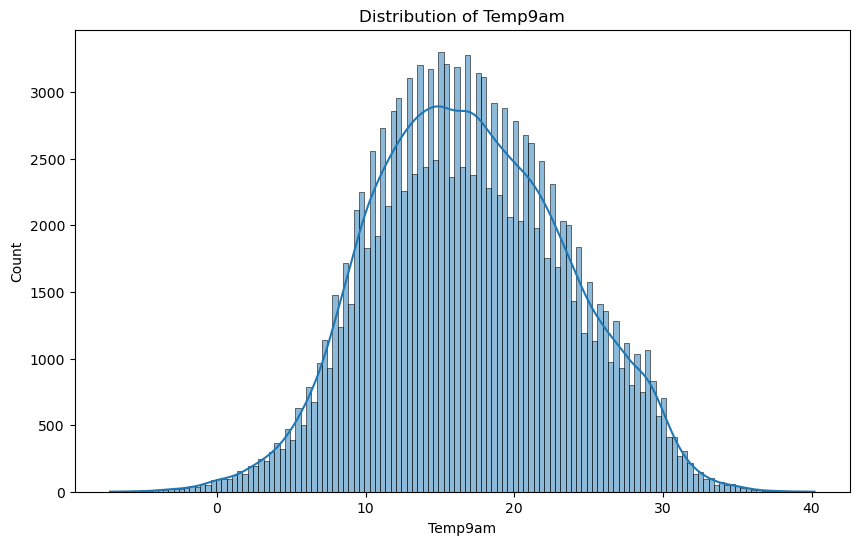

Skewness of Temp9am: 0.09138682047291519


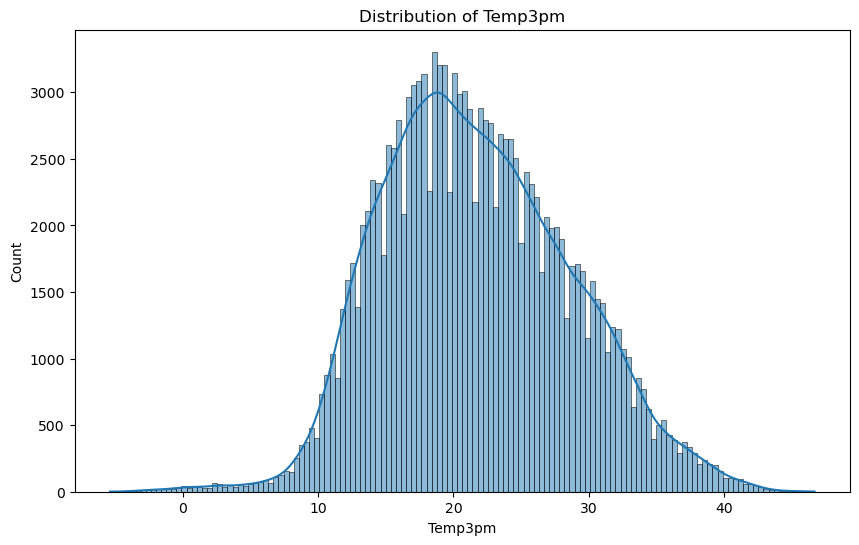

Skewness of Temp3pm: 0.2400541926656679


In [12]:
# Menghitung skewness dan membuat diagram distribusi
for col in numeric_columns_with_nan:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')

    plt.show()

    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')

In [13]:
df['Cloud9am'].value_counts().sort_index()

0.0     8587
1.0    15558
2.0     6442
3.0     5854
4.0     4373
5.0     5510
6.0     8072
7.0    19749
8.0    14389
9.0        2
Name: Cloud9am, dtype: int64

**NOTE:** <br>
Kolom yang memiliki distribusi Normal : `MinTemp`, `MaxTemp`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am`, `Temp3pm`. <br><br>
Kolom yang memiliki distribusi skewed : `Rainfall`, `Evaporation` <br> <br>

### Handling NaN Value
- Kolom dengan jenis object akan di imputasi dengan `mode`
- Kolom yang memiliki distribusi `Normal` akan di imputasi dengan `Mean`
- Kolom yang memiliki distribusi `Skewed` akan di imputasi dengan `Median`
- Khusus untuk kolom `Cloud9am` dan `Cloud3pm` akan di imputasi dengan `Random sample`

In [14]:
# Membuat fungsi untuk imputasi kolom object
def impute_object_columns(df):
    # Memilih kolom-kolom bertipe objek
    object_columns = df.select_dtypes(include='object').columns
    
    # Loop melalui kolom-kolom tersebut dan mengimpute dengan modus
    for column in object_columns:
        mode_value = df[column].mode().iloc[0]  # Mengambil nilai modus
        df[column].fillna(mode_value, inplace=True)  # Mengimpute nilai kosong dengan modus
    
    return df

In [15]:
# Contoh penggunaan fungsi
df = impute_object_columns(df)

In [16]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

In [17]:
numeric_columns_normal = [col for col in numeric_columns_with_nan if col not in ['Cloud3pm', 'Cloud9am', 'Rainfall', 'Evaporation']]

numeric_columns_skewed = numeric_columns_with_nan[2:4]

In [18]:
print(numeric_columns_with_nan)
print(numeric_columns_normal)
print(numeric_columns_skewed)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['MinTemp', 'MaxTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Rainfall', 'Evaporation']


In [19]:
# Membuat fungsi untuk 
def impute_numeric_columns(df, normal_columns, skewed_columns):
    # Imputasi kolom dengan distribusi normal menggunakan mean
    for column in normal_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    # Imputasi kolom dengan distribusi skewed menggunakan median
    for column in skewed_columns:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

    return df

In [20]:
df = impute_numeric_columns(df, numeric_columns_normal, numeric_columns_skewed)

In [21]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [26]:
def impute_random_sample(df, cloud_columns):
    for column in cloud_columns:
        # Menentukan indeks data yang memiliki nilai NaN pada kolom tertentu
        nan_indices = df[df[column].isna()].index
        
        # Mengambil sample secara acak dari kolom tersebut
        random_sample = df[column].dropna().sample(len(nan_indices), replace=True)
        
        # Mengisi nilai NaN dengan sample secara acak
        df.loc[nan_indices, column] = random_sample.values

    return df

In [24]:
cloud_columns = ['Cloud3pm', 'Cloud9am']

In [27]:
df = impute_random_sample(df, cloud_columns)

In [28]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [29]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,8.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,1.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [30]:
#The `plot_corr` function is used to create a correlation matrix heatmap plot for a given DataFrame, 
#visualizing the pairwise correlations between numeric columns within the dataset. 
#It provides a quick and intuitive way to assess the relationships between variables in the data.
def plot_corr(df, size=14):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

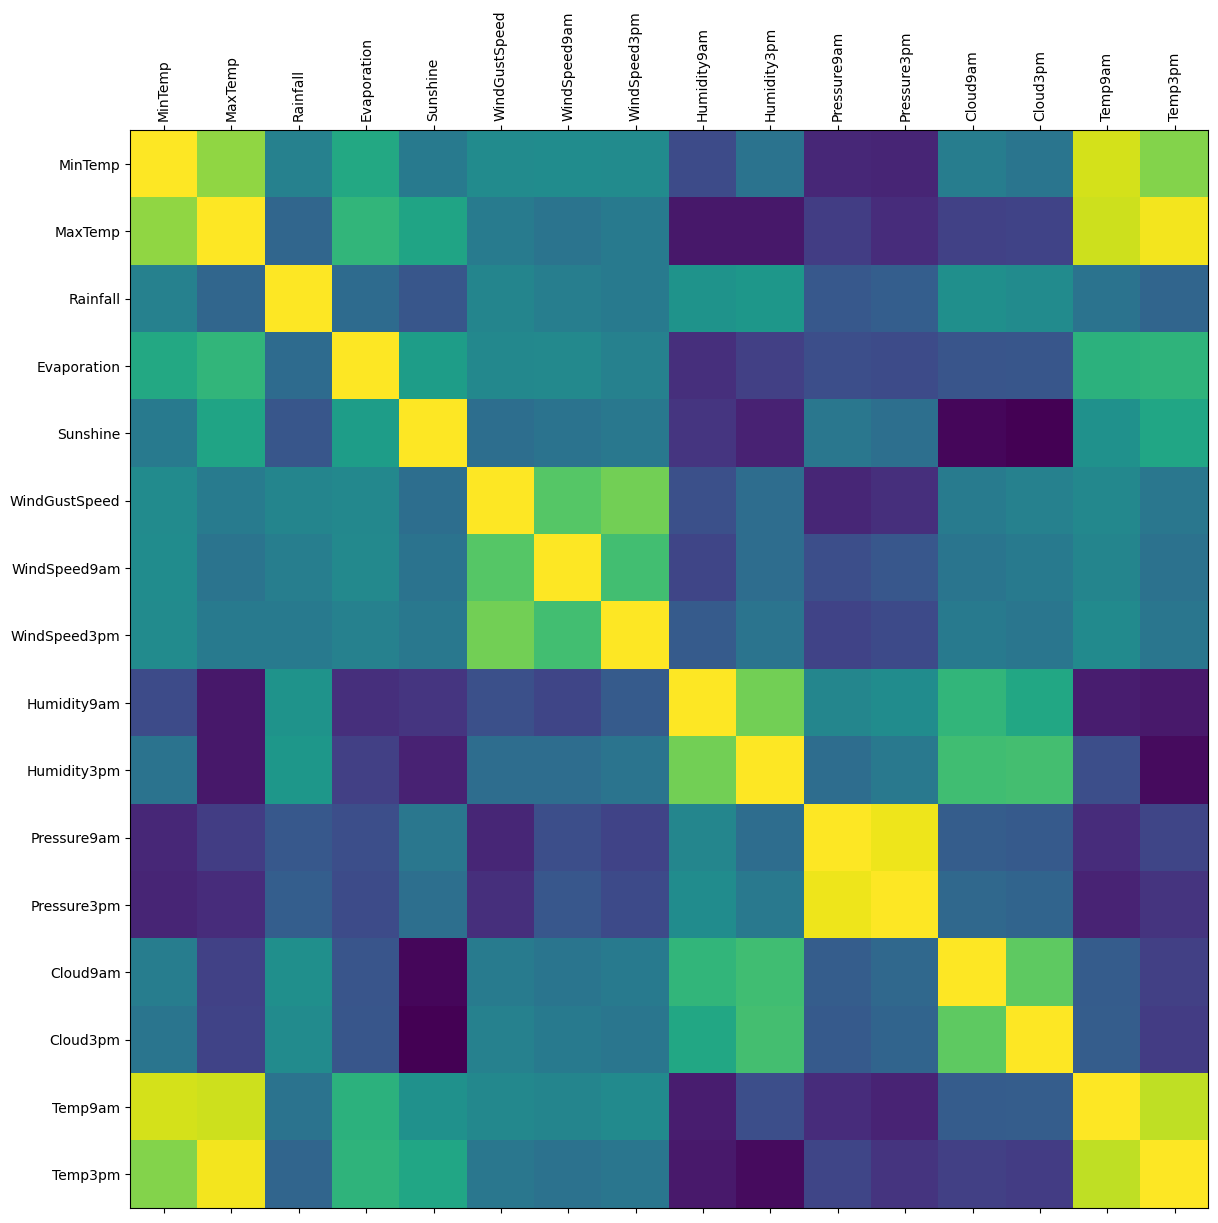

In [23]:
plot_corr(df)

In [36]:
len(df['Location'].value_counts())

49